

---

### IMPORT LIBRARY

---



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import TimeDistributed, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD



---

### LOAD DATA
---



In [ ]:
#Dataframe Training and Test
df_train = pd.read_csv('/content/emas.csv', index_col='Date', parse_dates=['Date'])
df_test = pd.read_csv('/content/emas.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
# Collab (concatenate) two dataframe with 
df = pd.concat([df_train, df_test])



---

### Data Preprocessing
---



In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3436 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3436 non-null   float64
 1   High           3436 non-null   float64
 2   Low            3436 non-null   float64
 3   Close          3436 non-null   float64
 4   Adj Close      3436 non-null   float64
 5   Volume         3436 non-null   int64  
 6   SP_open        3436 non-null   float64
 7   SP_high        3436 non-null   float64
 8   SP_low         3436 non-null   float64
 9   SP_close       3436 non-null   float64
 10  SP_Ajclose     3436 non-null   float64
 11  SP_volume      3436 non-null   int64  
 12  DJ_open        3436 non-null   float64
 13  DJ_high        3436 non-null   float64
 14  DJ_low         3436 non-null   float64
 15  DJ_close       3436 non-null   float64
 16  DJ_Ajclose     3436 non-null   float64
 17  DJ_volume      3436 non-null   int

In [ ]:
print(df['Adj Close'].describe())

count    3436.000000
mean      127.319482
std        17.533716
min       100.500000
25%       116.050003
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64


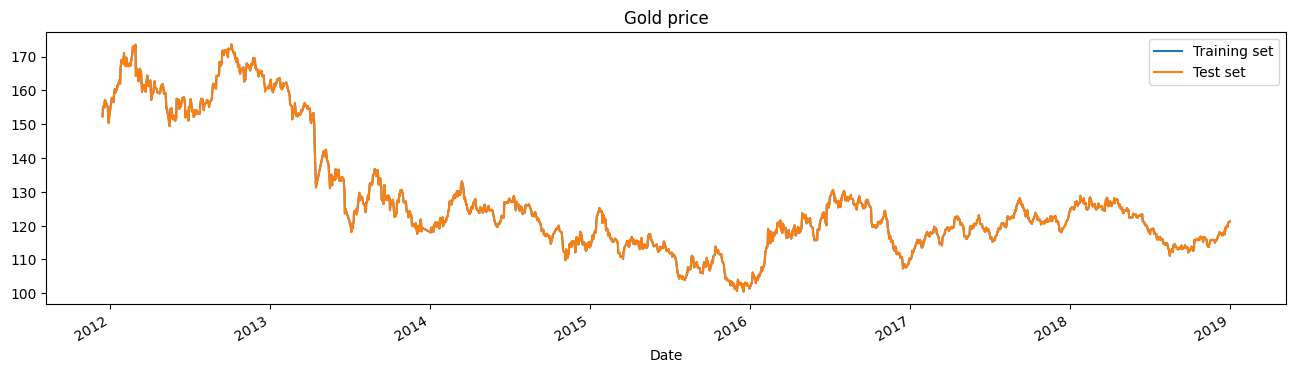

In [ ]:
# visualization train dan test nya
df_train["Adj Close"].plot(figsize=(16,4),legend=True)
df_test["Adj Close"].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('Gold price')
plt.show()

In [ ]:
#  Add New Collumn named "Adj Close Log" into the Dataframe
df_train["Adj Close Log"] = df_train.apply(lambda x: np.log(x["Adj Close"]), axis = 1)

In [ ]:
df_test["Adj Close Log"] = df_test.apply(lambda x: np.log(x["Adj Close"]), axis = 1)

In [ ]:
# Choose subset from index collumn 4 and 5 
training_set = df_train.iloc[:,4:6].values
testing_set = df_test.iloc[:,4:6].values



---


### Model Development

---



In [ ]:
# Scaling the dataset
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.transform(testing_set)

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual Gold Price')
    plt.plot(predicted, color='blue',label='Predicted Gold Price')
    plt.title('Gold Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Gold Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    mae = mean_absolute_error(test, predicted)
    rmse = mean_squared_error(test, predicted, squared= False)
    print("Mean absolute error, MAE = {}".format(mae))
    print("Root mean squared error, RMSE = {}".format(rmse))

def cal_X_y(dataset, h_id):
    X, y = [], []
    for i in range(h_id,len(dataset)-h_id):
        X.append(dataset[i-h_id:i,0])
        y.append(dataset[i,0])
    X, y = np.array(X), np.array(y)
    return X,y

In [ ]:
# Forecasting Horizon = 4 days
X_train, y_train = cal_X_y(training_set_scaled, 4)
X_test, y_test = cal_X_y(testing_set_scaled, 4)

In [ ]:
X_train[:5]

array([[0.70893176, 0.74859794, 0.74367384, 0.77253447],
       [0.74859794, 0.74367384, 0.77253447, 0.77499662],
       [0.74367384, 0.77253447, 0.77499662, 0.75967709],
       [0.77253447, 0.77499662, 0.75967709, 0.76337023],
       [0.77499662, 0.75967709, 0.76337023, 0.74422108]])

In [ ]:
y_train[:5]

array([0.77499662, 0.75967709, 0.76337023, 0.74422108, 0.6911503 ])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape((X_test.shape[0],X_train.shape[1],1))

In [ ]:
X_train_re = X_train.reshape((X_train.shape[0],1,X_train.shape[1],1))
X_test_re = X_test.reshape((X_test.shape[0],1,X_train.shape[1],1))

In [ ]:
y_train = np.reshape(y_train, (y_train.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))



---


### Model Testing and Evaluation


---



In [ ]:
# Model
model1 = Sequential()
# Describe Layer Model
model1.add(TimeDistributed(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', padding='same'), input_shape = (None,X_train_re.shape[2],1)))
model1.add(TimeDistributed(Conv1D(filters = 64, kernel_size = 2, activation='relu', padding='same')))
model1.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
model1.add(TimeDistributed(Flatten()))
# LSTM model
model1.add(LSTM(units = 100))
# Output layer
model1.add(Dense(1))
# compile the model
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, None, 4, 32)      96        
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, None, 4, 64)      4160      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 2, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 128)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 100)              

In [ ]:
model1.fit(X_train_re, y_train,A epochs=50, batch_size=128, verbose=True)

SyntaxError: ignored



---


### Conclusion

---



In [ ]:
predicted_y_test = model1.predict(X_test_re)

54/54 [==============================] - 1s 2ms/step


In [ ]:
return_rmse(y_test,predicted_y_test)


Mean absolute error, MAE = 0.36296597522863744
Root mean squared error, RMSE = 0.4338286898974997


In [ ]:
print(predicted_y_test)

[[0.00641093]
 [0.0065252 ]
 [0.00662875]
 ...
 [0.00210451]
 [0.00216953]
 [0.00226945]]


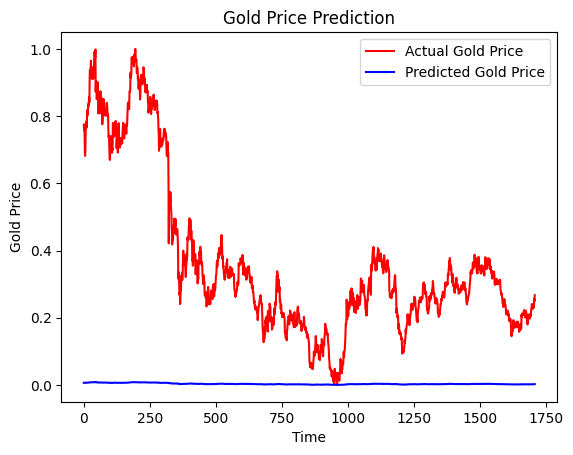

In [ ]:
plot_predictions(y_train,predicted_y_test) 
# X_train_re, y_train

In [ ]:
# predicted_y_real_price = np.exp(sc.inverse_transform(predicted_y_test))
# y_real_price = np.exp(sc.inverse_transform(y_test.reshape(-1,1)))

In [ ]:
# # Visualizing the results for CCN-LSTM-1 Model for forecasting horizon = 6
# plot_predictions(y_test_real_price,predicted_y_test_real_price)

THE END
